# 1. Loading the data

Within this notebook, we use [Bank marketing dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) containing data regarding the marketing campaign of a Portuguese banking institution. Bank clients were contacted via phone calls and offered a term deposit. 

Below you can see the explanation of selected features:

- age
- campaign: number of contacts performed during a campaign and for a client
- cons.conf.idx: consumer confidence index measured monthly
- cons.price.idx: consumer price index measured monthly
- nr.employed: number of employees measured quarterly

Target feature:
- y: whether a client subscribed to a term deposit

Let´s load libraries and the data:

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
variables = ['age','campaign','cons.conf.idx','cons.price.idx','nr.employed','y']
data = pd.read_csv('bank_marketing.csv',sep = ';', usecols = variables)
data.head(2)

,age,campaign,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,1,93.994,-36.4,5191.0,no
1,57,1,93.994,-36.4,5191.0,no


In [ ]:
# Renaming some features
data.rename(columns = {'campaign':'number_of_contacts','cons.conf.idx':'cci',
                       'cons.price.idx':'cpi','nr.employed':'number_of_emp'}, 
            inplace = True)

The dataset contains 41.188 observations, 6 features, and there are no missing values. 

In [ ]:
# The dimensions
data.shape

(41188, 6)

In [ ]:
# Checking for missing values
data.isnull().sum()

age                   0
number_of_contacts    0
cpi                   0
cci                   0
number_of_emp         0
y                     0
dtype: int64

# 2. Scaling without outliers treatment

As we mentioned in the video, you should always be aware of potential outliers within your data. In the first part of this section, we learn the basics of scaling techniques, namely `MinMaxScaler` and `StandardScaler`, while we won´t investigate any outliers. 

In section 3, you learn one of the possible methods of addressing outliers. In dedicated exercises, you will see how these outliers affected the results of scaling.

For now, only remember that both scalers are **very sensitive** to outliers.

## 2.1 Min-Max Scaler

Firstly, let´s demonstrate the implementation of `MinMaxScaler()`, interchangeably called "normalization". This transformer scales numerical features to a fixed range.
Take a look at [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 

Remember that a scaler needs to learn only on training data. Therefore let´s create training and holdout sets:

In [ ]:
# Creating sets
from sklearn.model_selection import train_test_split

X = data.drop('y', axis = 1)
y = data.y

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42)

Firstly, we import `MinMaxScaler()` from `scikit_learn´s preprocessing` module. 

Then we create a scaler object and store it in 'scaler' variable. Let´s keep the default range setting that scales features between 0 and 1:

In [ ]:
# Importing MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
# Create MinMaxScaler object
scaler = MinMaxScaler()

Now we fit a scaler on the training set; at this point, a scaler is learning minimum and maximum values of each feature:

In [ ]:
# Fitting a scaler on training set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

We can examine learned minimum and maximum values  using `data_min_` and `data_max_` attributes:

In [ ]:
# Learned minimum values 
scaler.data_min_

array([ 1.7000e+01,  1.0000e+00,  9.2201e+01, -5.0800e+01,  4.9636e+03])

In [ ]:
# Learned maximum values
scaler.data_max_

array([  98.   ,   43.   ,   94.767,  -26.9  , 5228.1  ])

You can also verify it by looking at the descriptive statistics of the original training set. Indeed, our scaler correctly identified and learned minimum and maximum values for each numerical feature. 

In [ ]:
# Minimum and maximum values of the original training set
X_train.describe().loc[['min','max']]

,age,number_of_contacts,cpi,cci,number_of_emp
min,17.0,1.0,92.201,-50.8,4963.6
max,98.0,43.0,94.767,-26.9,5228.1


Finally, we can transform the training set and store it in 'X_train_scaled' variable. At this point, a fitted scaler will scale each feature to a range between 0 and 1 based on what it learned from training data. Features will be on the same scale, and none of them will be dominant over the others.

In [ ]:
# Transforming training set and storing the output in X_train_scaled variable
min_max_scaled = scaler.transform(X_train)
# Inspecting transformed training set
min_max_scaled = pd.DataFrame(min_max_scaled)
min_max_scaled.head(3)

,0,1,2,3,4
0,0.148148,0.047619,0.199532,0.744770,0.226465
1,0.148148,0.071429,0.269680,0.192469,0.512287
2,0.345679,0.023810,0.698753,0.602510,0.859735


Let´s look at some facts. Minimum and maximum values will always be in the given range, in our case, between 0 and 1. But mean values and standard deviations vary across the features:

In [ ]:
# Examine the output
print('Mean: ', min_max_scaled.mean(axis=0))
print('Standard Deviation: ', min_max_scaled.std(axis=0))

Mean:  0    0.284089
1    0.037518
2    0.536346
3    0.430331
4    0.769043
dtype: float64
Standard Deviation:  0    0.129014
1    0.065531
2    0.225914
3    0.193927
4    0.274263
dtype: float64


### 2.1.1 Visualizing scales

Let´s inspect some of the features from the training set to compare scales before and after performing the scaling.

Observe how different scales the features have in the graph on the left side before performing any scaling. Especially notice the gap that is caused by feature 'number_of_emp' with a scale in the range of thousands compared to the others on entirely different scales (counted in units). 

On the right sight, all three features have a similar scale between 0 and 1 after scaling.

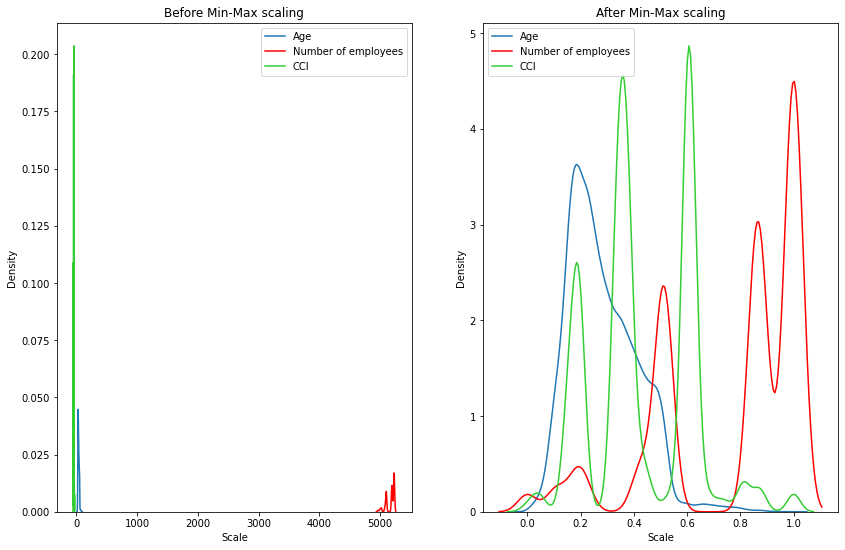

In [ ]:
#@title
fig, ax = plt.subplots(1,2, figsize = (14,9))
sns.kdeplot(X_train['age'], ax = ax[0])
sns.kdeplot(X_train['number_of_emp'], ax = ax[0], color = 'red')
sns.kdeplot(X_train['cci'], ax = ax[0], color = 'limegreen')
ax[0].legend(['Age','Number of employees','CCI'])
ax[0].set_title('Before Min-Max scaling')
ax[0].set_xlabel('Scale')
sns.kdeplot(min_max_scaled[0], ax = ax[1])
sns.kdeplot(min_max_scaled[4], ax = ax[1], color = 'red')
sns.kdeplot(min_max_scaled[3], ax = ax[1], color = 'limegreen')
ax[1].set_title('After Min-Max scaling')
ax[1].legend(['Age','Number of employees','CCI'])
ax[1].set_xlabel('Scale');

Remember that `MinMaxScaler` only changes the scale for us.

The distribution of data points remain the same, as we can see in the comparison below:

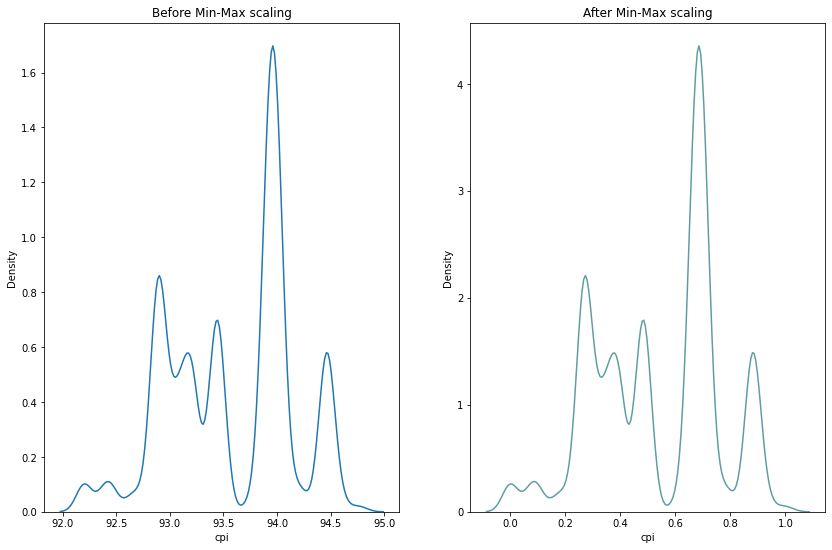

In [ ]:
#@title
fig, ax = plt.subplots(1,2, figsize = (14,9))
sns.kdeplot(X_train['cpi'], ax = ax[0])
ax[0].set_title('Before Min-Max scaling')
sns.kdeplot(min_max_scaled[2], ax = ax[1], color = 'cadetblue')
ax[1].set_title('After Min-Max scaling')
ax[1].set_xlabel('cpi');

## 2.2 Standard Scaler

Secondly, we discuss `StandardScaler()` that removes the mean and scale features to unit variance. Take a look at [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 


In other words, Standard Scaler centers the values of each feature around 0, and the standard deviation will be equal to 1. Let´s see the implementation of this scaler:



In [ ]:
# Importing StandardScaler 
from sklearn.preprocessing import StandardScaler

We create a scaler object and fit it on the training set:

In [ ]:
# Initializing a scaler
standard_scaler = StandardScaler()

In [ ]:
# Fitting a scaler on training set
standard_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

The fitted scaler remembers mean values and standard deviations for each feature. We can check it out using `scale_` and `mean_` attributes:

In [ ]:
# Standard deviation
standard_scaler.scale_

array([10.44994707,  2.75225545,  0.579684  ,  4.63478382, 72.54134036])

In [ ]:
# Mean
standard_scaler.mean_

array([ 4.00112032e+01,  2.57576914e+00,  9.35772643e+01, -4.05150914e+01,
        5.16701188e+03])

Next, we can transform the training set. A scaler subtracts the mean of a particular feature from each value and then divides it by standard deviation. 

In [ ]:
# Transforming training set
standard_scaled = standard_scaler.transform(X_train)
standard_scaled = pd.DataFrame(standard_scaled)
standard_scaled.head()

,0,1,2,3,4
0,-1.053709,0.154139,-1.490923,1.621455,-1.978346
1,-1.053709,0.517478,-1.180409,-1.226575,-0.936182
2,0.477399,-0.209199,0.718902,0.887871,0.330682
3,-0.575238,-0.572537,-1.180409,-1.226575,-0.936182
4,-0.766626,2.334170,-1.180409,-1.226575,-0.936182


You can verify the mean value of all features using `mean()` and see that each feature has a mean very close to 0. Using the `std()` function, we can compute the standard deviation and see that it equals 1.

> Notice that values are displayed in scientific notation, so you need to move the decimal point to the left accordingly. 

In [ ]:
# Mean
standard_scaled.mean()

0   -3.329783e-16
1   -4.347376e-16
2   -5.881579e-15
3    4.039081e-16
4   -2.725771e-15
dtype: float64

In [ ]:
# Standard deviation
standard_scaled.std()

0    1.000017
1    1.000017
2    1.000017
3    1.000017
4    1.000017
dtype: float64

### 2.2.1 Visualizing scales

Again, we compare scales before and after using StandardScaler. Now, the features have common scales, and the distribution is centered around 0:

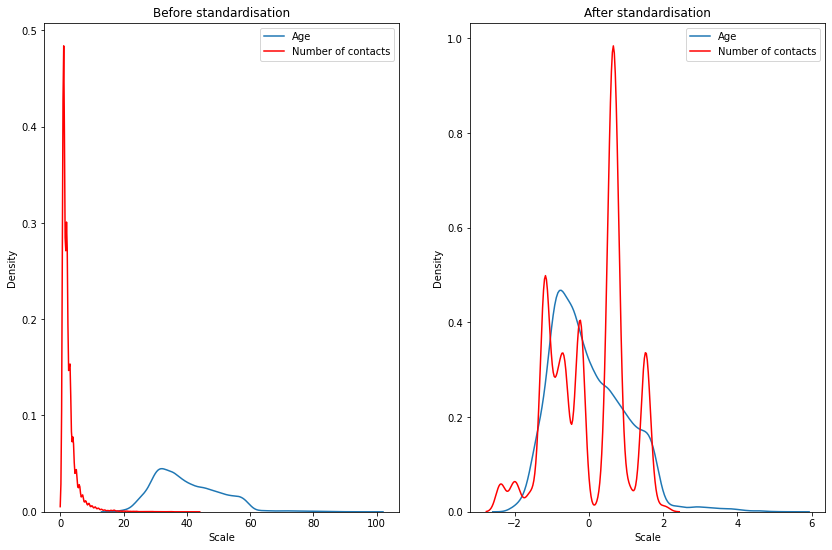

In [ ]:
#@title
fig, ax = plt.subplots(1,2, figsize = (14,9))
sns.kdeplot(X_train['age'], ax = ax[0])
sns.kdeplot(X_train['number_of_contacts'], ax = ax[0], color = 'red')
ax[0].legend(['Age','Number of contacts'])
ax[0].set_title('Before standardisation')
ax[0].set_xlabel('Scale')
sns.kdeplot(standard_scaled[0], ax = ax[1])
sns.kdeplot(standard_scaled[2], ax = ax[1], color = 'red')
ax[1].set_title('After standardisation')
ax[1].legend(['Age','Number of contacts'])
ax[1].set_xlabel('Scale');

StandardScaler, similarly to MinMaxScaler, **does not change** the distribution itself, only rescales the values:

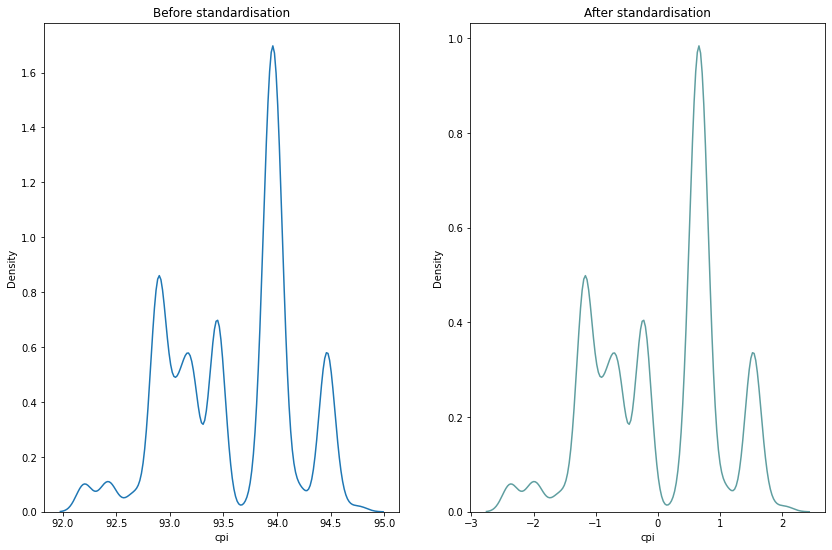

In [ ]:
#@title
fig, ax = plt.subplots(1,2, figsize = (14,9))
sns.kdeplot(X_train['cpi'], ax = ax[0])
ax[0].set_title('Before standardisation')
sns.kdeplot(standard_scaled[2], ax = ax[1], color = 'cadetblue')
ax[1].set_title('After standardisation')
ax[1].set_xlabel('cpi');

# 3. Outliers treatment

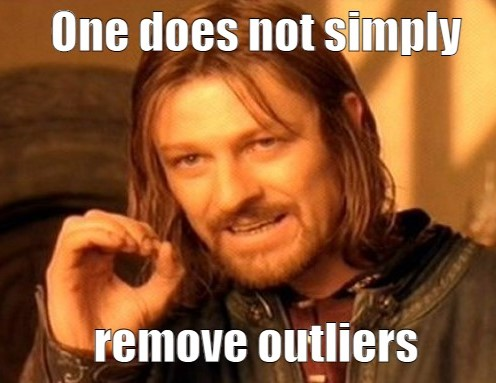


As we mentioned in the previous video, you should always spend some time thinking about outliers present in your data. Let´s visualize 3 features of the training set that might contain possible outliers.

At first, there is `'age'` feature with values between **17** and **98**. We can see that majority of data points are spread between **30** to **50** years. Every value above 70 is displayed as a black dot, meaning an outlier. I think we can exclude the possibility that these values are erroneous. It´s very likely that bank employees contacted clients older than 70 years. 

Secondly, we have `'number_of_contacts'` feature containing data about the number of phone calls. At first glance, you can see that there is a small range of values. More specifically, less than **75%** of clients received less than 3 calls. Then there are others for whom the number of calls is 20, 30, even more than 40. Is that realistic? Was indeed a particular client contacted more than **40** times? 

Lastly, `'cci'` feature represents the consumer confidence index that measures how optimistic or pessimistic consumers are regarding their expected financial situation. We can notice that all 'cci' values are negative, indicating overall pessimism among consumers. Values below **-35%** are displayed as outliers. In this case, we can consider these data points as natural and quite ok. The index might have been increasing towards better results due to improved financial situation at the particular time.

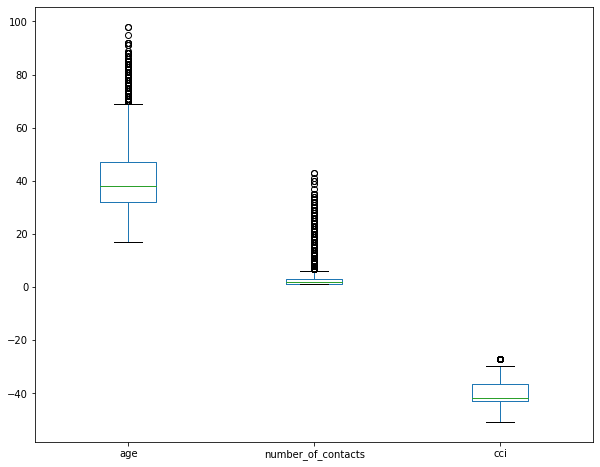

In [ ]:
# Features containing outliers
fig, ax = plt.subplots(figsize = (10,8))
X_train.boxplot(['age','number_of_contacts','cci'], ax = ax, grid = False);

After some considerations, you might decide to treat outliers for each feature differently. Let´s say, for 'age' you could replace outliers with the median age of clients. Regarding 'number_of_contacts' feature, you might want to remove all observations with such extreme values.

We learn to replace outliers with one of the capping methods using `Winsorizer()` from `feature_engine` library. You can read more about it in [the documentation](https://feature-engine.readthedocs.io/en/latest/outliers/Winsorizer.html).

In [ ]:
# Installing feature_engine
!pip install feature_engine

     |████████████████████████████████| 184kB 3.7MB/s 
     |████████████████████████████████| 9.5MB 16.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Importing Winsorizer
from feature_engine.outliers import Winsorizer

So as the capping method, we choose `iqr` limit to replace outliers with upper boundary values. 

In this case, Winsorizer will find the upper boundary by multiplication IQR by `1.5` and adding up the 75-th percentile. 
The Winsorizer will find these values for each feature separately and then replace all values above that boundary.

The distribution of the above three features is skewed to the right. Therefore we tell a Winsorizer to cap outliers on the `right` side using `tail` parameter.

Finally, we define for which features we want to cap outliers using `variables` parameter.

In [ ]:
# Defining arguments of Winsorizer
wins = Winsorizer(capping_method = 'iqr', fold = 1.5, tail = 'right', variables = ['age','number_of_contacts','cci'])

In [ ]:
# Fitting on training set
wins.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, missing_values='raise', tail='right',
           variables=['age', 'number_of_contacts', 'cci'])

After fitting a Winsorizer on the training set, we can see detected upper boundary values. 

In [ ]:
# Detected upper boundaries
wins.right_tail_caps_

{'age': 69.5, 'cci': -26.949999999999992, 'number_of_contacts': 6.0}

In [ ]:
# Transforming training set
training_trimmed = wins.transform(X_train)
training_trimmed.head(3)

,age,number_of_contacts,cpi,cci,number_of_emp
39075,29.0,3.0,92.713,-33.0,5023.5
34855,29.0,4.0,92.893,-46.2,5099.1
7107,45.0,2.0,93.994,-36.4,5191.0


At last, the data points are nicely spread! But remember, even we can not see any outliers right now, they still can be hidden somewhere. You will learn more about how to find possible outliers considering multiple dimensions later in the course. 

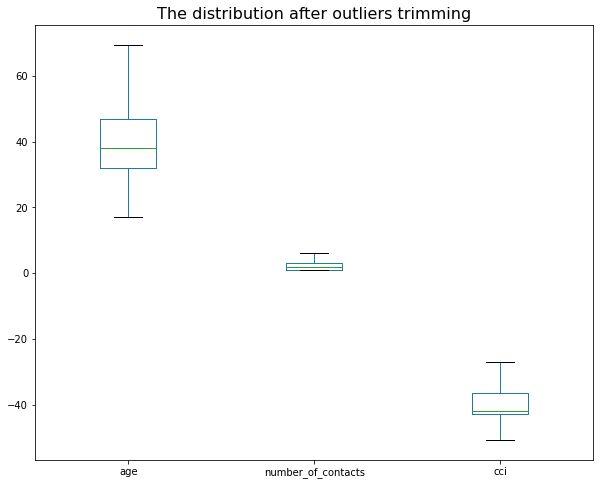

In [ ]:
# Features of traning set after outliers trimming
fig, ax = plt.subplots(figsize = (10,8))
training_trimmed.boxplot(['age','number_of_contacts','cci'], ax = ax, grid = False)
plt.title('The distribution after outliers trimming', fontsize = 16);

**TASK 1 FOR YOU**

Since we took care of outliers using the IQR technique, now it´s your time to practice scaling in the following exercises. After you complete the tasks, you will visually compare transformed features and see how outliers affect scaling results with `MinMaxScaler` and `StandardScaler`.

You are supposed to perform scaling on the training set stored in 'training_trimmed' variable.

In [ ]:
# TASK 1A >>> Create a MinMaxScaler object and store it in 'scaler' variable
scaler = MinMaxScaler()

In [ ]:
# TASK 1B >>> Fit a scaler on training set stored in 'training_trimmed' variable
scaler.fit(training_trimmed)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# TASK 1C >>> Examine minimum values per feature that a scaler learned from training set 
scaler.data_min_

array([ 1.7000e+01,  1.0000e+00,  9.2201e+01, -5.0800e+01,  4.9636e+03])

In [ ]:
# TASK 1D >>> Examine maximum values per feature that a scaler learned from training set 
scaler.data_max_

array([  69.5  ,    6.   ,   94.767,  -26.95 , 5228.1  ])

In [ ]:
# TASK 1E >>> Transform training set stored in 'training_trimmed' variable
#         >>> Store the output in 'training_set_mm' variable
#         >>> To examine how the features were scaled, store 'training_set_mm' as a DataFrame and inspect the first 5 rows
training_set_mm = scaler.transform(training_trimmed)
training_set_mm = pd.DataFrame(training_set_mm)
training_set_mm.head()

,0,1,2,3,4
0,0.228571,0.4,0.199532,0.746331,0.226465
1,0.228571,0.6,0.269680,0.192872,0.512287
2,0.533333,0.2,0.698753,0.603774,0.859735
3,0.323810,0.0,0.269680,0.192872,0.512287
4,0.285714,1.0,0.269680,0.192872,0.512287


If you completed the tasks above and transformed training data, you can run the below code. It will produce two visualizations. In the first one, there are features containing outliers scaled using `MinMaxScaler`. The second visualization displays results of scaling with `MinMaXScaler` for features that do not have outliers. 

Compare how significant effects have outliers regarding the scaling. In the visualization on the right, you should notice that features have more comparable scales after outliers treatment.

In [ ]:
# TASK 1F >>> Run the code and observe the difference between visualizations
fig, ax = plt.subplots(1,2, figsize = (14,9))
sns.kdeplot(min_max_scaled[0], ax = ax[0], color = 'gold')
sns.kdeplot(min_max_scaled[1], ax = ax[0], color = 'lightseagreen')
sns.kdeplot(min_max_scaled[3], ax = ax[0], color = 'indianred')
ax[0].legend(['Age','Number of contacts','CCI'])
ax[0].set_title('Min-Max scaling with outliers', fontsize = 18)
ax[0].set_xlabel('Scale')
sns.kdeplot(training_set_mm[0], ax = ax[1], color = 'gold')
sns.kdeplot(training_set_mm[1], ax = ax[1], color = 'lightseagreen')
sns.kdeplot(training_set_mm[3], ax = ax[1], color = 'indianred')
ax[1].set_title('Min-Max scaling WITHOUT outliers', fontsize = 18)
ax[1].legend(['Age','Number of contacts','CCI'])
ax[1].set_xlabel('Scale');

**TASK 2 FOR YOU**

Finally, try for yourself feature scaling with `StandardScaler`. Again, you are supposed to transform training data for which we took care of outliers. 

In [ ]:
# TASK 2A >>> Create a StandardScaler object and store it in 'scaler_standard' variable
scaler_standard = StandardScaler()

In [ ]:
# TASK 2B >>> Fit a scaler on training set stored in 'training_trimmed' variable
scaler_standard.fit(training_trimmed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# TASK 2C >>> Transform training set stored in 'training_trimmed' variable
#         >>> Store the output in 'training_set_standard' variable
#         >>> To examine how the features were scaled, store 'training_set_standard' as a DataFrame and inspect the first 5 rows
training_set_standard = scaler_standard.transform(training_trimmed)
training_set_standard = pd.DataFrame(training_set_standard)
training_set_standard.head(2)

,0,1,2,3,4
0,-1.076507,0.461742,-1.490923,1.622159,-1.978346
1,-1.076507,1.106039,-1.180409,-1.226893,-0.936182


In [ ]:
# TASK 2D >>> Take a look at mean value per feature to verify that are close to 0
training_set_standard.mean()

0    5.994919e-17
1    2.650984e-16
2   -5.881579e-15
3    1.168524e-16
4   -2.725771e-15
dtype: float64

In [ ]:
# TASK 2E >>> Take a look at values of standard deviation per feature that should be equal to 1
training_set_standard.std()

0    1.000017
1    1.000017
2    1.000017
3    1.000017
4    1.000017
dtype: float64

Now it´s time to compare the impact of outliers so that you can run the below code. In the graph on the left, notice that the scale was originally from -2.5 to 15. This is caused by feature 'number_of_contacts' that originally contained many values significantly different from the rest of the data points. On the other hand, when we replace outliers, all 3 features now have comparable scales. 

In [ ]:
# TASK 2F >>> Run the code and observe the difference between visualizations
fig, ax = plt.subplots(1,2, figsize = (14,9))
sns.kdeplot(standard_scaled[0], ax = ax[0], color = 'gold')
sns.kdeplot(standard_scaled[1], ax = ax[0], color = 'lightseagreen')
sns.kdeplot(standard_scaled[3], ax = ax[0], color = 'indianred')
ax[0].legend(['Age','Number of contacts','CCI'])
ax[0].set_title('Standard scaling with outliers', fontsize = 18)
ax[0].set_xlabel('Scale')
sns.kdeplot(training_set_standard[0], ax = ax[1], color = 'gold')
sns.kdeplot(training_set_standard[1], ax = ax[1], color = 'lightseagreen')
sns.kdeplot(training_set_standard[3], ax = ax[1], color = 'indianred')
ax[1].set_title('Standard scaling WITHOUT outliers', fontsize = 18)
ax[1].legend(['Age','Number of contacts','CCI'])
ax[1].set_xlabel('Scale');